<a href="https://colab.research.google.com/github/riiii-bit43/data-science/blob/main/Consumer_churn_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [12]:
from google.colab import files
uploaded = files.upload()

Saving cell2cell-duke univeristy.csv to cell2cell-duke univeristy.csv


In [13]:
import pandas as pd

In [14]:
df = pd.read_csv("cell2cell-duke univeristy.csv")
df.head()

,Unnamed: 0,X,customer,traintest,churn,churndep,revenue,mou,recchrge,directas,overage,roam,changem,changer,dropvce,blckvce,unansvce,custcare,threeway,mourec,outcalls,incalls,peakvce,opeakvce,dropblk,callfwdv,callwait,months,uniqsubs,actvsubs,phones,models,eqpdays,age1,age2,children,credita,creditaa,prizmrur,prizmub,prizmtwn,refurb,webcap,truck,rv,occprof,occcler,occcrft,occstud,occhmkr,occret,occself,ownrent,marryun,marryyes,mailord,mailres,mailflag,travel,pcown,creditcd,retcalls,retaccpt,newcelly,newcelln,refer,incmiss,income,mcycle,setprcm,setprc,retcall
0,1,1,1000002,0,0,NaN,57.492500,482.75,37.424999,0.2475,22.75,0.0,532.25,50.987499,8.333333,1.000000,61.333332,1.666667,0.333333,55.279999,46.333332,6.333333,83.666664,157.000000,9.333333,0.0,5.666667,56,1,1,7.0,6.0,240.0,30.0,0.0,0,0,1,0,0,0,0,1,1,1,0,0,0,0,0,0,0,1,0,0,1,1,0,0,0,1,0,0,0,1,0,0,5,0,0,149.989990,0
1,2,2,1000006,0,0,NaN,82.275002,1312.25,75.000000,1.2375,0.00,0.0,156.75,8.145000,52.000000,7.666667,76.000000,4.333333,1.333333,200.320007,370.333344,147.000000,555.666687,303.666656,59.666668,0.0,22.666666,59,2,2,9.0,4.0,458.0,30.0,0.0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,1,0,0,1,0,0,0,6,0,0,9.989998,0
2,3,3,1000010,0,0,NaN,31.662500,25.50,29.990000,0.2475,0.00,0.0,59.50,4.027500,0.000000,1.000000,2.333333,0.000000,0.000000,0.000000,0.000000,0.000000,1.666667,1.666667,1.000000,0.0,0.000000,57,2,2,2.0,2.0,601.0,52.0,58.0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,1,1,1,0,1,0,1,0,0,0,1,0,0,9,0,0,29.989990,0
3,4,4,1000011,0,0,NaN,62.127499,97.50,65.985001,2.4750,0.00,0.0,23.50,6.822500,0.000000,0.333333,4.000000,4.000000,0.000000,0.000000,3.666667,0.000000,7.666667,7.333333,0.333333,0.0,0.000000,59,2,2,3.0,3.0,464.0,46.0,46.0,1,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,1,1,0,0,0,1,0,0,1,0,0,0,6,0,0,29.989990,0
4,5,5,1000014,0,0,NaN,25.225000,2.50,25.000000,0.0000,0.00,0.0,-2.50,-0.225000,0.000000,0.000000,0.333333,0.000000,0.000000,1.133333,0.333333,0.000000,0.666667,0.666667,0.000000,0.0,0.000000,53,2,2,2.0,2.0,354.0,0.0,0.0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,1,0,0,0,7,0,0,29.989990,0


In [15]:
df = df.drop(columns=['Unnamed: 0', 'X', 'customer'], errors='ignore')

In [16]:
df = df.drop_duplicates()

In [17]:
numeric_cols = df.select_dtypes(include=['number']).columns
categorical_cols = df.select_dtypes(exclude=['number']).columns

In [18]:
df[numeric_cols] = df[numeric_cols].fillna(df[numeric_cols].median())

In [20]:
for col in categorical_cols:
    df[col].fillna(df[col].mode()[0], inplace=True)

In [21]:
df.columns = df.columns.str.strip().str.lower()

In [22]:
print("✅ Data cleaning completed successfully.")
print(f"New shape: {df.shape[0]} rows × {df.shape[1]} columns")
print(f"Remaining missing values: {df.isnull().sum().sum()}")
df.head()

✅ Data cleaning completed successfully.
New shape: 71047 rows × 69 columns
Remaining missing values: 0


,traintest,churn,churndep,revenue,mou,recchrge,directas,overage,roam,changem,changer,dropvce,blckvce,unansvce,custcare,threeway,mourec,outcalls,incalls,peakvce,opeakvce,dropblk,callfwdv,callwait,months,uniqsubs,actvsubs,phones,models,eqpdays,age1,age2,children,credita,creditaa,prizmrur,prizmub,prizmtwn,refurb,webcap,truck,rv,occprof,occcler,occcrft,occstud,occhmkr,occret,occself,ownrent,marryun,marryyes,mailord,mailres,mailflag,travel,pcown,creditcd,retcalls,retaccpt,newcelly,newcelln,refer,incmiss,income,mcycle,setprcm,setprc,retcall
0,0,0,0.5,57.492500,482.75,37.424999,0.2475,22.75,0.0,532.25,50.987499,8.333333,1.000000,61.333332,1.666667,0.333333,55.279999,46.333332,6.333333,83.666664,157.000000,9.333333,0.0,5.666667,56,1,1,7.0,6.0,240.0,30.0,0.0,0,0,1,0,0,0,0,1,1,1,0,0,0,0,0,0,0,1,0,0,1,1,0,0,0,1,0,0,0,1,0,0,5,0,0,149.989990,0
1,0,0,0.5,82.275002,1312.25,75.000000,1.2375,0.00,0.0,156.75,8.145000,52.000000,7.666667,76.000000,4.333333,1.333333,200.320007,370.333344,147.000000,555.666687,303.666656,59.666668,0.0,22.666666,59,2,2,9.0,4.0,458.0,30.0,0.0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,1,0,0,1,0,0,0,6,0,0,9.989998,0
2,0,0,0.5,31.662500,25.50,29.990000,0.2475,0.00,0.0,59.50,4.027500,0.000000,1.000000,2.333333,0.000000,0.000000,0.000000,0.000000,0.000000,1.666667,1.666667,1.000000,0.0,0.000000,57,2,2,2.0,2.0,601.0,52.0,58.0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,1,1,1,0,1,0,1,0,0,0,1,0,0,9,0,0,29.989990,0
3,0,0,0.5,62.127499,97.50,65.985001,2.4750,0.00,0.0,23.50,6.822500,0.000000,0.333333,4.000000,4.000000,0.000000,0.000000,3.666667,0.000000,7.666667,7.333333,0.333333,0.0,0.000000,59,2,2,3.0,3.0,464.0,46.0,46.0,1,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,1,1,0,0,0,1,0,0,1,0,0,0,6,0,0,29.989990,0
4,0,0,0.5,25.225000,2.50,25.000000,0.0000,0.00,0.0,-2.50,-0.225000,0.000000,0.000000,0.333333,0.000000,0.000000,1.133333,0.333333,0.000000,0.666667,0.666667,0.000000,0.0,0.000000,53,2,2,2.0,2.0,354.0,0.0,0.0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,1,0,0,0,7,0,0,29.989990,0


In [23]:
import matplotlib.pyplot as plt
import seaborn as sns

In [24]:
sns.set(style="whitegrid", palette="pastel")
plt.rcParams['figure.figsize'] = (8, 5)

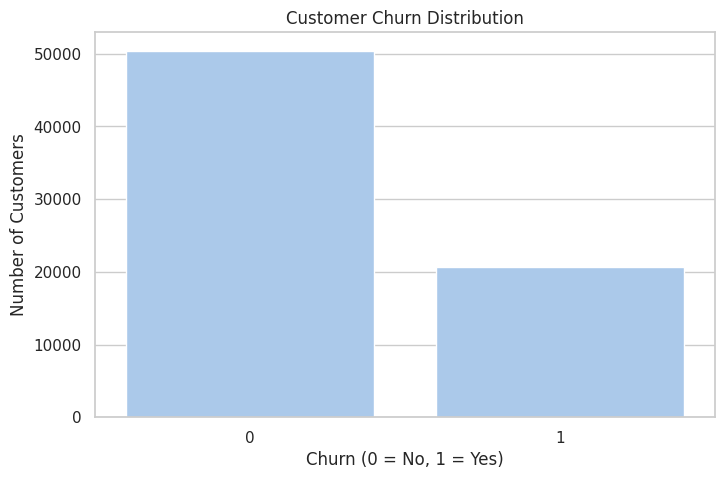

In [25]:
plt.figure()
sns.countplot(x='churn', data=df)
plt.title('Customer Churn Distribution')
plt.xlabel('Churn (0 = No, 1 = Yes)')
plt.ylabel('Number of Customers')
plt.show()

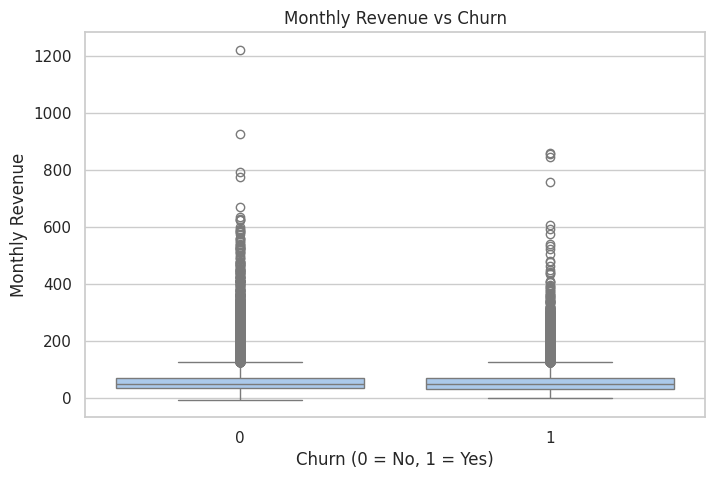

In [26]:
plt.figure()
sns.boxplot(x='churn', y='revenue', data=df)
plt.title('Monthly Revenue vs Churn')
plt.xlabel('Churn (0 = No, 1 = Yes)')
plt.ylabel('Monthly Revenue')
plt.show()

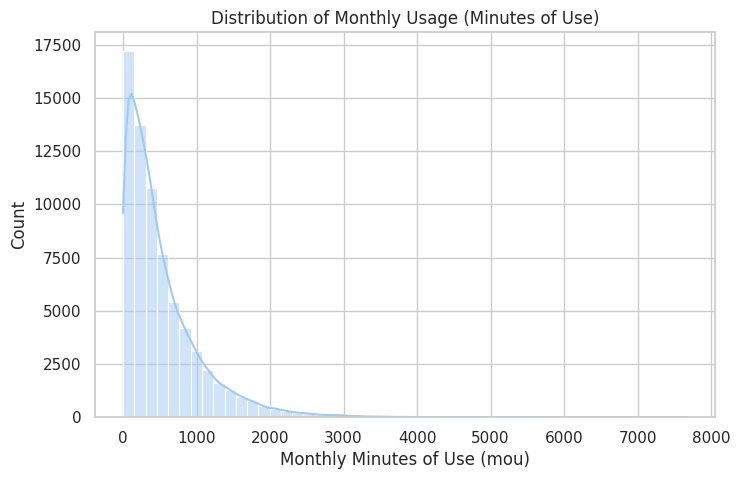

In [27]:
plt.figure()
sns.histplot(data=df, x='mou', bins=50, kde=True)
plt.title('Distribution of Monthly Usage (Minutes of Use)')
plt.xlabel('Monthly Minutes of Use (mou)')
plt.ylabel('Count')
plt.show()


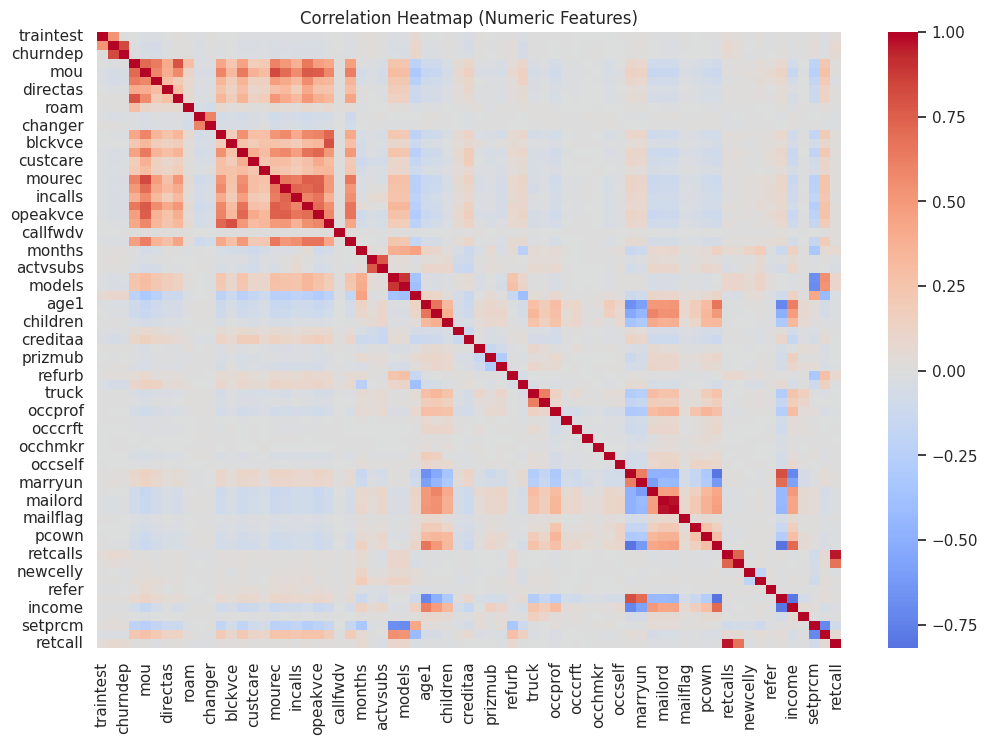

In [28]:
plt.figure(figsize=(12, 8))
corr = df.corr(numeric_only=True)
sns.heatmap(corr, cmap="coolwarm", center=0)
plt.title('Correlation Heatmap (Numeric Features)')
plt.show()

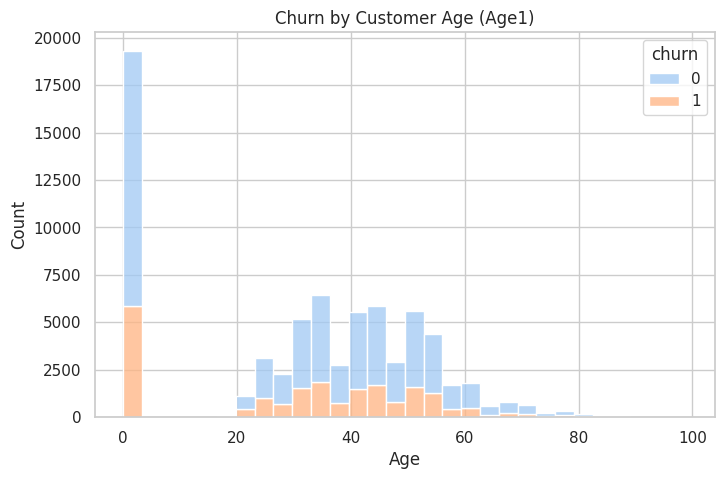

EDA visualizations completed successfully!


In [29]:
if 'age1' in df.columns:
    plt.figure()
    sns.histplot(data=df, x='age1', hue='churn', multiple='stack', bins=30)
    plt.title('Churn by Customer Age (Age1)')
    plt.xlabel('Age')
    plt.ylabel('Count')
    plt.show()
    print("EDA visualizations completed successfully!")

In [30]:
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
import numpy as np

In [31]:
features = ['revenue', 'mou', 'overage', 'roam', 'recchrge', 'dropvce', 'months']

In [33]:
features = [col for col in features if col in df.columns]
X = df[features].copy()

In [34]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [35]:
inertia = []
K = range(1, 10)
for k in K:
    km = KMeans(n_clusters=k, random_state=42)
    km.fit(X_scaled)
    inertia.append(km.inertia_)

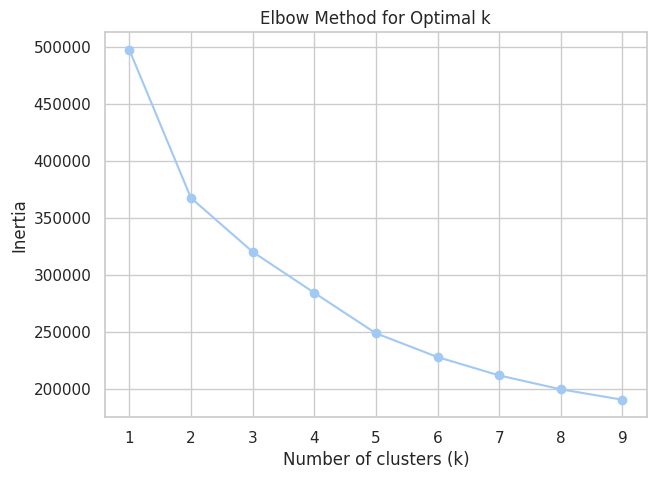

In [36]:
plt.figure(figsize=(7, 5))
plt.plot(K, inertia, 'bo-')
plt.title('Elbow Method for Optimal k')
plt.xlabel('Number of clusters (k)')
plt.ylabel('Inertia')
plt.show()

In [37]:
kmeans = KMeans(n_clusters=4, random_state=42)
df['cluster'] = kmeans.fit_predict(X_scaled)

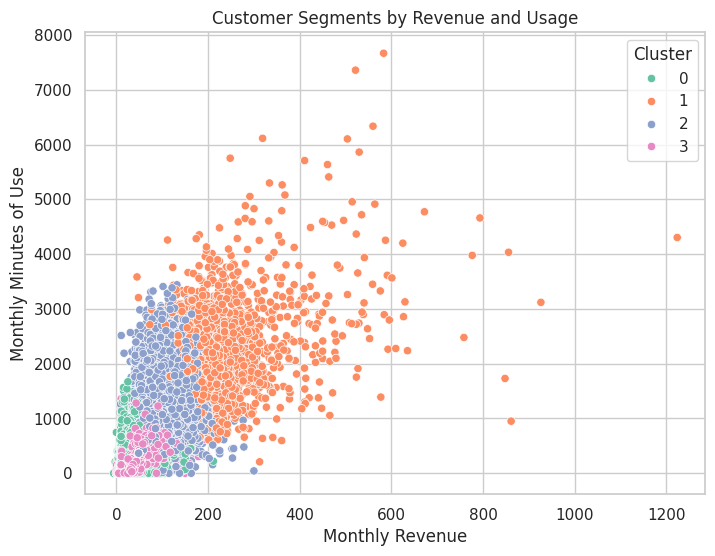

In [38]:
plt.figure(figsize=(8, 6))
sns.scatterplot(x='revenue', y='mou', hue='cluster', data=df, palette='Set2')
plt.title('Customer Segments by Revenue and Usage')
plt.xlabel('Monthly Revenue')
plt.ylabel('Monthly Minutes of Use')
plt.legend(title='Cluster')
plt.show()

In [39]:
cluster_summary = df.groupby('cluster')[features].mean().round(2)
print("Cluster Summary (Average values per cluster):")
print(cluster_summary)

Cluster Summary (Average values per cluster):
         revenue      mou  overage   roam  recchrge  dropvce  months
cluster                                                             
0          42.76   329.21    15.47   0.70     40.51     3.26   13.24
1         233.80  2112.00   433.22  10.74     87.33    25.80   19.31
2          95.07  1095.85    79.40   2.02     68.79    13.60   17.35
3          42.78   276.06    16.43   0.62     37.01     3.10   30.60


In [40]:
churn_rate = df['churn'].mean() * 100
print(f"Overall Churn Rate: {churn_rate:.2f}%")

Overall Churn Rate: 29.01%


In [41]:
if 'cluster' in df.columns:
    churn_by_cluster = df.groupby('cluster')['churn'].mean() * 100
    print("\nChurn Rate by Cluster (%):")
    print(churn_by_cluster.round(2))



Churn Rate by Cluster (%):
cluster
0    29.01
1    28.75
2    27.11
3    30.61
Name: churn, dtype: float64


In [42]:
if 'cluster' in df.columns:
    cluster_summary = df.groupby('cluster')[['revenue', 'mou', 'months']].mean().round(2)
    print("\nAverage Metrics per Cluster:")
    print(cluster_summary)


Average Metrics per Cluster:
         revenue      mou  months
cluster                          
0          42.76   329.21   13.24
1         233.80  2112.00   19.31
2          95.07  1095.85   17.35
3          42.78   276.06   30.60


/tmp/ipython-input-3433653644.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=churn_by_cluster.index, y=churn_by_cluster.values, palette='coolwarm')


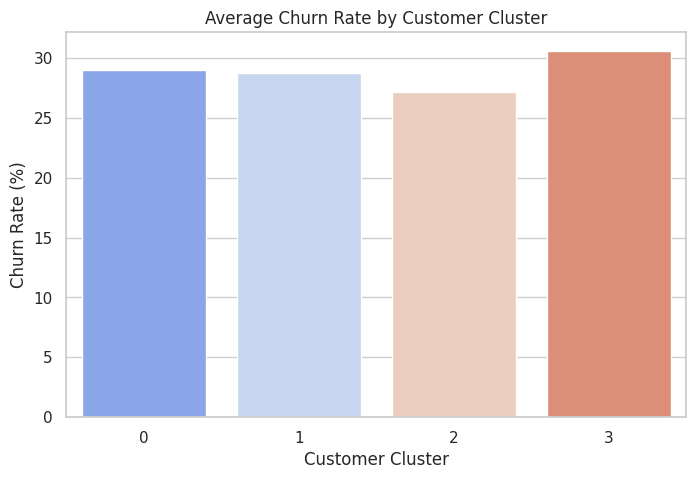

In [43]:
if 'cluster' in df.columns:
    plt.figure(figsize=(8,5))
    sns.barplot(x=churn_by_cluster.index, y=churn_by_cluster.values, palette='coolwarm')
    plt.title('Average Churn Rate by Customer Cluster')
    plt.xlabel('Customer Cluster')
    plt.ylabel('Churn Rate (%)')
    plt.show()

In [44]:
if churn_rate > 30:
    print("The churn rate is quite high — consider improving retention campaigns.")
else:
    print("Churn rate is moderate, but there’s still room for retention improvement.")

print("Customers with higher monthly revenue or longer tenure tend to churn less.")
print("Lower-usage customers or those with high overage fees may be at higher churn risk.")
print("Cluster segmentation shows distinct groups — focus marketing on high-value, low-churn segments.")

print("\nRECOMMENDATIONS:")
print("Launch loyalty programs for long-tenure customers.")
print("Target high-churn clusters with retention offers or better plans.")
print("Reduce overage costs or improve service quality to lower dissatisfaction.")
print("Encourage higher engagement from low-usage customers with usage-based rewards.")

print("\nCustomer analysis completed successfully!")

Churn rate is moderate, but there’s still room for retention improvement.
Customers with higher monthly revenue or longer tenure tend to churn less.
Lower-usage customers or those with high overage fees may be at higher churn risk.
Cluster segmentation shows distinct groups — focus marketing on high-value, low-churn segments.

RECOMMENDATIONS:
Launch loyalty programs for long-tenure customers.
Target high-churn clusters with retention offers or better plans.
Reduce overage costs or improve service quality to lower dissatisfaction.
Encourage higher engagement from low-usage customers with usage-based rewards.

Customer analysis completed successfully!
